In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('fitness_class_2212.csv')  

print("Dataset Shape:", df.shape)
print("\nFirst 5 Rows:")
df.head()

Dataset Shape: (1500, 8)

First 5 Rows:


,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,Wed,PM,Strength,0
1,2,10,79.01,2,Mon,AM,HIIT,0
2,3,16,74.53,14,Sun,AM,Strength,0
3,4,5,86.12,10,Fri,AM,Cycling,0
4,5,15,69.29,8,Thu,AM,HIIT,0


In [2]:
print("\nNull Values:")
print(df.isnull().sum())


Null Values:
booking_id           0
months_as_member     0
weight              20
days_before          0
day_of_week          0
time                 0
category             0
attended             0
dtype: int64


In [3]:
# Preprocessing
# handle NaN values
df = df.dropna()

# change days before to float
df["days_before"] = (df["days_before"].str.replace("days", "", regex=False)
                     .str.strip()
                     .astype(float))

# change - to missing value in category
df = df.replace("-", regex= False)

# make day of the week values uniform
df["day_of_week"] = (df["day_of_week"].str.lower()
                     .map(lambda x: "monday" if "m" in x else x)
                     .map(lambda x: "tuesday" if "ue" in x else x)
                     .map(lambda x: "wednesday" if "w" in x else x)
                     .map(lambda x: "thursday" if "hu" in x else x)
                     .map(lambda x: "friday" if "f" in x else x)
                     .map(lambda x: "saturday" if "sat" in x else x)
                     .map(lambda x: "sunday" if "un" in x else x))


C:\Users\Admin\AppData\Local\Temp\ipykernel_20868\3879291464.py:11: FutureWarning: DataFrame.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  df = df.replace("-", regex= False)


#### Assignment 1 - perform EDA on the dataset

In [4]:
# ASSIGNMENT BEGIN

df.info() # check dataset structure
print(f"\nNull values:\n", df.isnull().sum())
print(f"\nDuplicate values:", df.duplicated().sum())


<class 'pandas.core.frame.DataFrame'>
Index: 1480 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1480 non-null   int64  
 1   months_as_member  1480 non-null   int64  
 2   weight            1480 non-null   float64
 3   days_before       1480 non-null   float64
 4   day_of_week       1480 non-null   object 
 5   time              1480 non-null   object 
 6   category          1480 non-null   object 
 7   attended          1480 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 104.1+ KB

Null values:
 booking_id          0
months_as_member    0
weight              0
days_before         0
day_of_week         0
time                0
category            0
attended            0
dtype: int64

Duplicate values: 0


In [5]:
# Dataset Formatting
# remove booking_id from analysis as it is just an identifier like an index
df = df.drop("booking_id", axis = 1)

cat = df.select_dtypes(include = ['object']).columns # one hot encode days of the week, category, attended and time (AM/PM)
encoded_df = pd.get_dummies(df, columns = cat, dtype = int)

encoded_df.head()

,months_as_member,weight,days_before,attended,day_of_week_friday,day_of_week_monday,day_of_week_saturday,day_of_week_sunday,day_of_week_thursday,day_of_week_tuesday,day_of_week_wednesday,time_AM,time_PM,category_Aqua,category_Cycling,category_HIIT,category_Strength,category_Yoga
0,17,79.56,8.0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0
1,10,79.01,2.0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
2,16,74.53,14.0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0
3,5,86.12,10.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0
4,15,69.29,8.0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0


       months_as_member       weight  days_before     attended  \
count       1480.000000  1480.000000  1480.000000  1480.000000   
mean          15.659459    82.610378     8.356081     0.303378   
std           12.971138    12.765859     4.082097     0.459873   
min            1.000000    55.410000     1.000000     0.000000   
25%            8.000000    73.490000     4.000000     0.000000   
50%           12.000000    80.760000     9.000000     0.000000   
75%           19.000000    89.520000    12.000000     1.000000   
max          148.000000   170.520000    29.000000     1.000000   

       day_of_week_friday  day_of_week_monday  day_of_week_saturday  \
count          1480.00000         1480.000000           1480.000000   
mean              0.20473            0.152027              0.135135   
std               0.40364            0.359168              0.341983   
min               0.00000            0.000000              0.000000   
25%               0.00000            0.000000     

<Axes: xlabel='months_as_member', ylabel='count'>

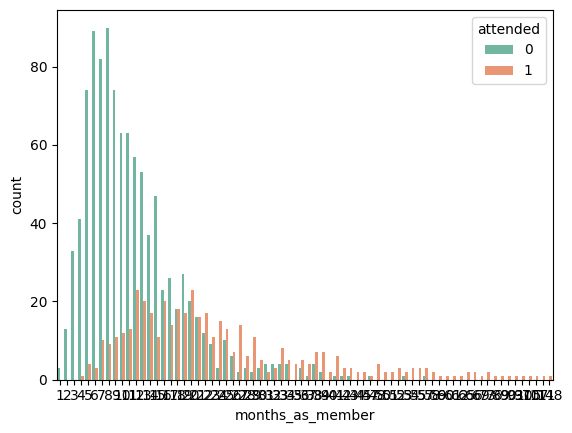

In [6]:
# Assignment: EDA
# bivariate analysis 
print(encoded_df.describe()) # count is 129; ranges, mean, max and min are reasonable  

import seaborn as sns

sns.countplot(x = "months_as_member", data = df, hue = "attended", palette = "Set2") 

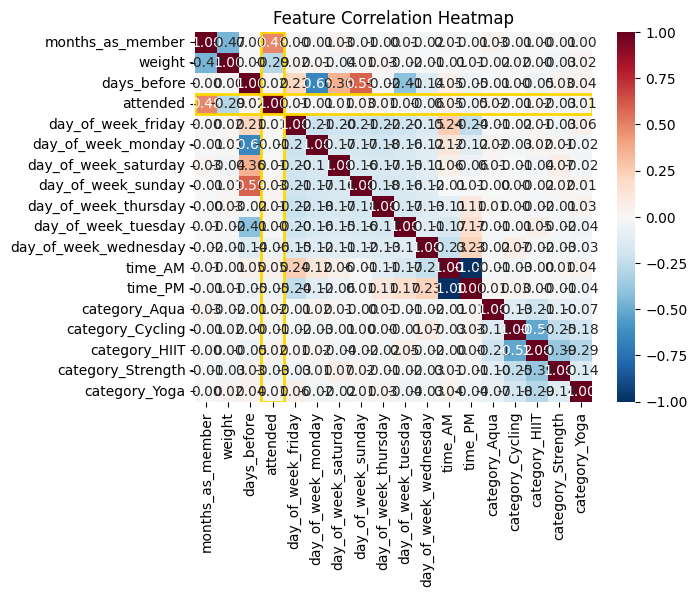

In [7]:
# multivariate analysis
corr = encoded_df.corr()
sns.heatmap(corr, annot = True, cmap = 'RdBu_r', fmt = '.2f')

import matplotlib.patches as patches # formatting to highlight target variable

ax = plt.gca()
n = corr.columns.get_loc("attended") 
i = corr.index.get_loc("attended")
border1 = patches.Rectangle((n, 0), 1, corr.shape[0], linewidth = 2, edgecolor = 'gold', facecolor = 'none')
border2 = patches.Rectangle((0, i), corr.shape[0], 1, linewidth = 2, edgecolor = 'gold', facecolor = 'none')
ax.add_patch(border1)
ax.add_patch(border2)

plt.title('Feature Correlation Heatmap')
plt.show() 

In [8]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV

# Split features and target
X = encoded_df.drop('attended', axis=1)  
y = encoded_df['attended']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
from sklearn.preprocessing import StandardScaler

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
# Balancing the Dataset (SMOTE: Oversampling using imblearn library)
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

In [12]:
#Logistic Regression 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, 
    confusion_matrix, roc_auc_score, roc_curve, classification_report )

lr_balanced = LogisticRegression(random_state=42)
lr_balanced.fit(X_train_balanced, y_train_balanced)
y_pred_lr_balanced = lr_balanced.predict(X_test_scaled)

print("\nLogistic Regression Performance (With Balancing):")
print(classification_report(y_test, y_pred_lr_balanced))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr_balanced))


Logistic Regression Performance (With Balancing):
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       308
           1       0.59      0.62      0.60       136

    accuracy                           0.75       444
   macro avg       0.71      0.72      0.71       444
weighted avg       0.75      0.75      0.75       444

Confusion Matrix:
[[248  60]
 [ 51  85]]


In [13]:
from sklearn.ensemble import RandomForestClassifier

#Random Forest
rf_balanced = RandomForestClassifier(random_state=42)
rf_balanced.fit(X_train_balanced, y_train_balanced)
y_pred_rf_balanced = rf_balanced.predict(X_test_scaled)

print("\nRandom Forest Performance (With Balancing):")
print(classification_report(y_test, y_pred_rf_balanced))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf_balanced))


Random Forest Performance (With Balancing):
              precision    recall  f1-score   support

           0       0.84      0.81      0.82       308
           1       0.59      0.64      0.61       136

    accuracy                           0.75       444
   macro avg       0.71      0.72      0.72       444
weighted avg       0.76      0.75      0.76       444

Confusion Matrix:
[[248  60]
 [ 49  87]]


In [14]:
#Hyperparameter Tuning (Random Forest)
from sklearn.model_selection import GridSearchCV

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5)
grid_search_rf.fit(X_train_balanced, y_train_balanced)

print("\nBest Parameters for Random Forest:")
print(grid_search_rf.best_params_)

# Evaluate tuned Random Forest
best_rf = grid_search_rf.best_estimator_
y_pred_best_rf = best_rf.predict(X_test_scaled)

print("\nTuned Random Forest Performance:")
print(classification_report(y_test, y_pred_best_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best_rf))


Best Parameters for Random Forest:
{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}

Tuned Random Forest Performance:
              precision    recall  f1-score   support

           0       0.84      0.80      0.82       308
           1       0.59      0.65      0.62       136

    accuracy                           0.75       444
   macro avg       0.71      0.72      0.72       444
weighted avg       0.76      0.75      0.76       444

Confusion Matrix:
[[246  62]
 [ 48  88]]


In [15]:
#Cross-Validation (Random Forest)
from sklearn.model_selection import cross_val_score

cv_scores_rf = cross_val_score(best_rf, X_train_balanced, y_train_balanced, cv=5, scoring='accuracy')
print("\nRandom Forest Cross-Validation Scores:", cv_scores_rf)
print("Mean CV Accuracy:", cv_scores_rf.mean())


Random Forest Cross-Validation Scores: [0.73448276 0.80622837 0.78200692 0.83391003 0.84429066]
Mean CV Accuracy: 0.8001837489559719


In [16]:
#Gradient Boosting Trees (GBT)
from sklearn.ensemble import GradientBoostingClassifier

gbt = GradientBoostingClassifier(random_state=42)
gbt.fit(X_train_balanced, y_train_balanced)
y_pred_gbt = gbt.predict(X_test_scaled)

print("\nGradient Boosting Trees Performance:")
print(classification_report(y_test, y_pred_gbt))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gbt))


Gradient Boosting Trees Performance:
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       308
           1       0.62      0.65      0.63       136

    accuracy                           0.77       444
   macro avg       0.73      0.73      0.73       444
weighted avg       0.77      0.77      0.77       444

Confusion Matrix:
[[253  55]
 [ 48  88]]


In [ ]:
# Assignment: Hyperparameter Tuning GBT model

params_tune_gbt = {
    "learning_rate": [0.1, 0.2],
    "n_estimators" : [50, 100, 200],
    "min_samples_split": [2, 5, 10]
}

grid_search_gbt = GridSearchCV(GradientBoostingClassifier(random_state=42), params_tune_gbt, cv = 5)
grid_search_gbt.fit(X_train_balanced, y_train_balanced)

print(f"\nBest Parameters For Gradient Boosting Classifier:", grid_search_gbt.best_params_)

# Evaluate tuned Gradient Boosting Classifier
best_gbt = grid_search_gbt.best_estimator_
y_pred_best_gbt = best_gbt.predict(X_test_scaled)

print("\n Tuned Gradient Boosting Classifier:")
print(classification_report(y_test, y_pred_best_gbt))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best_gbt))



Best Parameters For Gradient Boosting Classifier: {'learning_rate': 0.1, 'min_samples_split': 10, 'n_estimators': 100}

 Tuned Gradient Boosting Classifier:
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       308
           1       0.61      0.63      0.62       136

    accuracy                           0.77       444
   macro avg       0.72      0.73      0.73       444
weighted avg       0.77      0.77      0.77       444

Confusion Matrix:
[[254  54]
 [ 50  86]]


In [19]:
# Assignment: Hyperparameter Tuning Logistic Regression Model
params_tune_lr = {
    "C": [0.5, 1.0, 1.5],
    "max_iter": [80, 100, 120]
}

grid_search_lr = GridSearchCV(LogisticRegression(random_state=42), params_tune_lr, cv = 5)
grid_search_lr.fit(X_train_balanced, y_train_balanced)

print(f"\nBest Parameters For Logistic Regression:", grid_search_lr.best_params_)

# Evaluate tuned Logistic Regression model
best_lr = grid_search_lr.best_estimator_
y_pred_best_lr = best_lr.predict(X_test_scaled)

print("\n Tuned Logistic Regression Model:")
print(classification_report(y_test, y_pred_best_lr))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best_lr))



Best Parameters For Logistic Regression: {'C': 1.0, 'max_iter': 80}

 Tuned Logistic Regression Model:
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       308
           1       0.59      0.62      0.60       136

    accuracy                           0.75       444
   macro avg       0.71      0.72      0.71       444
weighted avg       0.75      0.75      0.75       444

Confusion Matrix:
[[248  60]
 [ 51  85]]


c:\Users\Admin\Documents\Code Workspaces\Data Science - IntelliTech\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
c:\Users\Admin\Documents\Code Workspaces\Data Science - IntelliTech\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


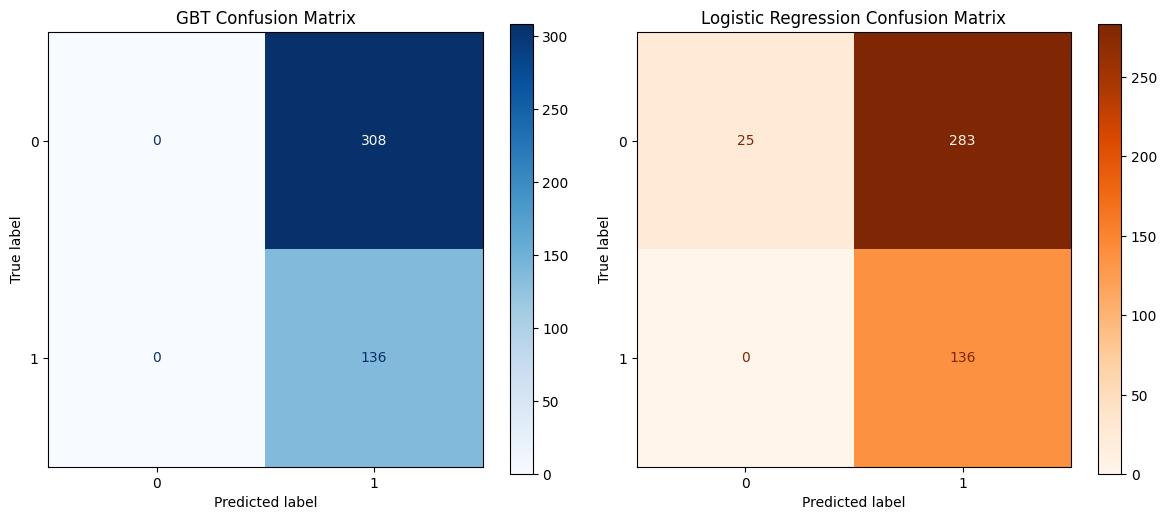

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

# Assuming you already have predictions
y_pred_gbt = best_gbt.predict(X_test)
y_pred_lr = best_lr.predict(X_test)

# Compute confusion matrices
cm_gbt = confusion_matrix(y_test, y_pred_gbt)
cm_lr = confusion_matrix(y_test, y_pred_lr)

# Plot side by side
fig, axes = plt.subplots(1, 2, figsize=(12,5))

disp_gbt = ConfusionMatrixDisplay(confusion_matrix=cm_gbt)
disp_gbt.plot(ax=axes[0], cmap="Blues", values_format="d")
axes[0].set_title("GBT Confusion Matrix")

disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr)
disp_lr.plot(ax=axes[1], cmap="Oranges", values_format="d")
axes[1].set_title("Logistic Regression Confusion Matrix")

plt.tight_layout()
plt.show()


As we can see, both models generated a lot of false positives. 